# Support Vector Machines

In this part, we will be using Support Vector Machines (SVMs) to build a spam classifier.

# 1. Support Vector Machines

In the first half, we will be using Support Vector Machines (SVMs) with various example 2D datasets.

Example Dataset 1

In [3]:
import mat4py as mat
import numpy as np
import matplotlib.pyplot as plt
import random
from __future__ import division

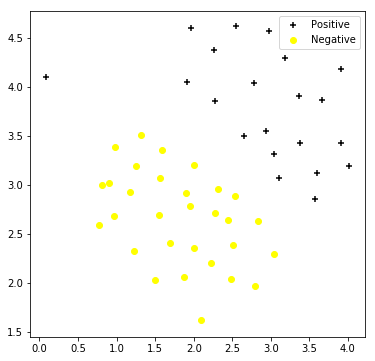

In [4]:
data1 = mat.loadmat("E:\\Machine Learning\\1\\ex6data1.mat")

X = np.mat(data1["X"])
y = np.mat(data1["y"])
X1 = X[:, 0]
X2 = X[:, 1]

plt.figure(num = 1, figsize = (6, 6))
plt.scatter([X1[y == 1]], [X2[y == 1]], marker = "+", color = "black")
plt.scatter([X1[y == 0]], [X2[y == 0]], marker = "o", color = "yellow")
plt.legend(labels = ["Positive", "Negative"])

In this dataset, the positions of the positive examples and the negative examples suggest a natural separation indicated by the gap. Notice that there is an outlier positive example + on the far left.

In [5]:
tol = 1e-3
max_passes = 5
C = 1

def svmTrainLinearKernel(X, y, C, tol, max_passes):
    m = np.shape(X)[0]
    n = np.shape(X)[1]
    
    # Map 0 to -1
    y[y == 0] = -1
    
    alphas = np.transpose(np.mat(np.zeros(m)))
    b = 0
    E = np.zeros(m)
    passes = 0
    eta= 0
    L = 0
    H = 0
    
    # Pre-compute the Kernel Matri
    K = X * np.transpose(X)
    
    
    # Train
    while passes < max_passes:
        
        num_changed_alphas = 0

        for i in range(0, m, 1):
            
            # Calculate Ei = f(x(i)) - y(i) = sum(alpha * y * K[:, i]) + b - y(i)
            E[i] = b + (sum(np.multiply(np.multiply(alphas, y), K[:, i])) - y[i, :])[0, 0]

            if (y[i, :][0, 0] * E[i] < -tol and alphas[i][0, 0] < C) or (y[i, :][0, 0] * E[i] > tol and alphas[i][0, 0] > 0):
                j = int(np.floor(m * random.uniform(0, 1)))
                while (j == i):
                    j = int(np.floor(m * random.uniform(0, 1)))

                    
                # Calculate Ej = f(x(j)) - y(j) = sum(alpha * y * K[:, j]) + b - y(j)
                E[j] = b + (sum(np.multiply(np.multiply(alphas, y), K[:, j])) - y[j, :])[0, 0]

                
                # Save old alphas
                alpha_i_old = alphas[i][0, 0]
                alpha_j_old = alphas[j][0, 0]

                
                # Compute L and H
                if (y[i, :] == y[j, :]):
                    L = max(0, alphas[j][0, 0] + alphas[i][0, 0] - C)
                    H = min(C, alphas[j][0, 0] + alphas[i][0, 0])
                else:
                    L = max(0, alphas[j][0, 0] - alphas[i][0, 0])
                    H = min(C, C + alphas[j][0, 0] - alphas[i][0, 0])

                if (L == H):
                    # continue to next i
                    continue
                    

                # Compute eta 
                eta = 2 * K[i, j] - K[i, i] - K[j, j]
                if (eta >= 0):
                    # continue to next i
                    continue

                    
                # Compute and clip new value for alpha j 
                alphas[j] = alphas[j] - (y[j, :] * (E[i] - E[j])) / eta

                
                # Clip
                alphas[j] = min(H, alphas[j])
                alphas[j] = max(L, alphas[j])

                
                # Check if change in alpha is significant
                if (abs(alphas[j][0, 0] - alpha_j_old) < tol):
                    alphas[j] = alpha_j_old
                    continue

                    
                # Determine value for alpha i
                alphas[i] = alphas[i] + y[i, :] * y[j, :] * (alpha_j_old - alphas[j][0, 0])

                
                # Compute b1 and b2
                b1 = b - E[i] - y[i, :] * (alphas[i][0, 0] - alpha_i_old) * np.transpose(K[i, j]) \
                        - y[j, :] * (alphas[j][0, 0] - alpha_j_old) * np.transpose(K[i, j])
                b2 = b - E[j] - y[i, :] * (alphas[i][0, 0] - alpha_i_old) * np.transpose(K[i, j]) \
                        - y[j, :] * (alphas[j][0, 0] - alpha_j_old) * np.transpose(K[j, j])

                # Compute b
                if (0 < alphas[i, :] and alphas[i, :] < C):
                    b = b1
                elif (0 < alphas[j, :] and alphas[j, :] < C):
                    b = b2
                else:
                    b = (b1 + b2) / 2


                num_changed_alphas = num_changed_alphas + 1
    
    
        if (num_changed_alphas == 0):
            passes = passes + 1
        else:
            passes = 0
            
    
    idx = np.where(alphas > 0)[0]
    model_X = X[idx, :]
    model_y = y[idx, :]
    model_b = b
    model_alphas = alphas[idx]
    model_w = np.transpose(np.transpose(np.multiply(alphas, y)) * X)
    
    
    return (model_w, model_b)

In [6]:
C = 1

model_w = svmTrainLinearKernel(X, y, C, tol, max_passes)[0]
model_b = svmTrainLinearKernel(X, y, C, tol, max_passes)[1]

def visualizeBoundaryLinear(X, y, model_w, model_b):
    w = np.array(model_w)
    b = model_b[0, 0]
    xp = np.linspace(0, 5, 100)
    yp = -(w[0] * xp + b) / w[1]
    
    plt.figure(num = 1, figsize = (6, 6))
    plt.scatter([X1[y == 1]], [X2[y == 1]], marker = "+", color = "black")
    plt.scatter([X1[y == -1]], [X2[y == -1]], marker = "o", color = "yellow")
    plt.plot(xp, yp)
    plt.legend(labels = ["Decision Boundary", "Positive", "Negative"], loc = "upper right")
    
    
    return

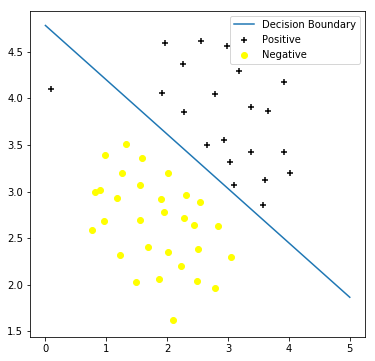

In [7]:
visualizeBoundaryLinear(X, y, model_w, model_b)

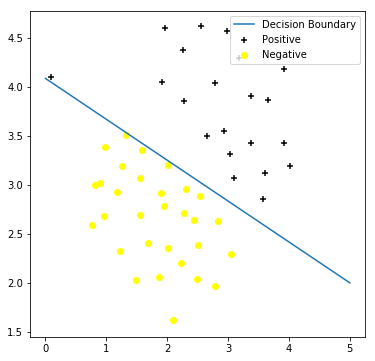

In [9]:
C = 100

model_w = svmTrainLinearKernel(X, y, C, tol, max_passes)[0]
model_b = svmTrainLinearKernel(X, y, C, tol, max_passes)[1]

visualizeBoundaryLinear(X, y, model_w, model_b)

SVM with Gaussian Kernels

In this part, we will be using SVMs to do non-linear classification. 

Gaussian Kernel

We can think of the Gaussian Kernel as a similarity function that measures the "distance" between a pair of examples, (x(i), x(j)).

K_gaussian(x(i), x(j)) = exp(-||x(i) - x(j)||^2 / (2 * sigma^2)) = exp(-sum(x(i) - x(j))^2)

In [460]:
X1 = np.array((1, 2, 1))
X2 = np.array((0, 4, -1))
sigma = 2

def guassianKernel(X1, X2, sigma):
    sim = np.exp(-sum(np.power(X1 - X2, 2)) / (2 * (sigma ** 2)))
    
    return sim

In [461]:
guassianKernel(X1, X2, sigma)

0.32465246735834974

Example Dataset 2

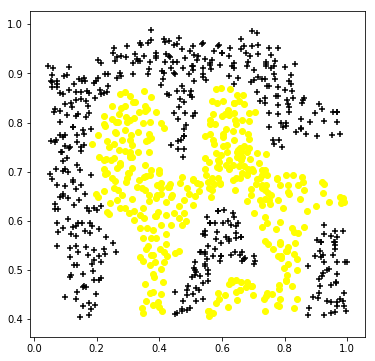

In [475]:
data2 = mat.loadmat("E:\\Machine Learning\\1\\ex6data2.mat")

X = np.mat(data2["X"])
y = np.mat(data2["y"])

X1 = X[:, 0]
X2 = X[:, 1]

plt.figure(num = 1, figsize = (6, 6))
plt.scatter([X1[y == 1]], [X2[y == 1]], marker = "+", color = "black")
plt.scatter([X1[y == 0]], [X2[y == 0]], marker = "o", color = "yellow")

In [737]:
tol = 1e-3
max_passes = 5
C = 1

def svmTrainGaussianKernel(X, y, C, tol, max_passes):
    m = np.shape(X)[0]
    n = np.shape(X)[1]
    
    # Map 0 to -1
    y[y == 0] = -1
    
    alphas = np.transpose(np.mat(np.zeros(m)))
    b = 0
    E = np.zeros(m)
    passes = 0
    eta= 0
    L = 0
    H = 0
    
    # Pre-compute the Kernel Matrix
    K = np.zeros(np.shape(X)[0] * np.shape(X)[0])
    K = K.reshape((np.shape(X)[0], np.shape(X)[0]))

    for j in range(0, np.shape(X)[0], 1):
        L = X[j]

        for i in range(0, np.shape(X)[0], 1):
            distance = np.sum(np.power(X[i] - L, 2), axis = 1)[0, 0]
            K[i, j] = np.exp(-distance / (2 * (sigma ** 2)))
            K[j, i] = K[i, j]

    
    # Train
    while passes < max_passes:
        
        num_changed_alphas = 0

        for i in range(0, m, 1):
            
            # Calculate Ei = f(x(i)) - y(i) = sum(alpha * y * K[:, i]) + b - y(i)
            E[i] = b + (sum(np.multiply(np.multiply(alphas, y), K[:, i])) - y[i, :])[0, 0]

            if (y[i, :][0, 0] * E[i] < -tol and alphas[i][0, 0] < C) or (y[i, :][0, 0] * E[i] > tol and alphas[i][0, 0] > 0):
                j = int(np.floor(m * random.uniform(0, 1)))
                while (j == i):
                    j = int(np.floor(m * random.uniform(0, 1)))

                    
                # Calculate Ej = f(x(j)) - y(j) = sum(alpha * y * K[:, j]) + b - y(j)
                E[j] = b + (sum(np.multiply(np.multiply(alphas, y), K[:, j])) - y[j, :])[0, 0]

                
                # Save old alphas
                alpha_i_old = alphas[i][0, 0]
                alpha_j_old = alphas[j][0, 0]

                
                # Compute L and H
                if (y[i, :] == y[j, :]):
                    L = max(0, alphas[j][0, 0] + alphas[i][0, 0] - C)
                    H = min(C, alphas[j][0, 0] + alphas[i][0, 0])
                else:
                    L = max(0, alphas[j][0, 0] - alphas[i][0, 0])
                    H = min(C, C + alphas[j][0, 0] - alphas[i][0, 0])

                if (L == H):
                    # continue to next i
                    continue
                    

                # Compute eta 
                eta = 2 * K[i, j] - K[i, i] - K[j, j]
                if (eta >= 0):
                    # continue to next i
                    continue

                    
                # Compute and clip new value for alpha j 
                alphas[j] = alphas[j] - (y[j, :] * (E[i] - E[j])) / eta

                
                # Clip
                alphas[j] = min(H, alphas[j])
                alphas[j] = max(L, alphas[j])

                
                # Check if change in alpha is significant
                if (abs(alphas[j][0, 0] - alpha_j_old) < tol):
                    alphas[j] = alpha_j_old
                    continue

                    
                # Determine value for alpha i
                alphas[i] = alphas[i] + y[i, :] * y[j, :] * (alpha_j_old - alphas[j][0, 0])

                
                # Compute b1 and b2
                b1 = b - E[i] - y[i, :] * (alphas[i][0, 0] - alpha_i_old) * np.transpose(K[i, j]) \
                        - y[j, :] * (alphas[j][0, 0] - alpha_j_old) * np.transpose(K[i, j])
                b2 = b - E[j] - y[i, :] * (alphas[i][0, 0] - alpha_i_old) * np.transpose(K[i, j]) \
                        - y[j, :] * (alphas[j][0, 0] - alpha_j_old) * np.transpose(K[j, j])

                # Compute b
                if (0 < alphas[i, :] and alphas[i, :] < C):
                    b = b1
                elif (0 < alphas[j, :] and alphas[j, :] < C):
                    b = b2
                else:
                    b = (b1 + b2) / 2


                num_changed_alphas = num_changed_alphas + 1
    
    
        if (num_changed_alphas == 0):
            passes = passes + 1
        else:
            passes = 0
            
    
#     idx = np.where(alphas > 0)[0]
#     model_X = X[idx, :]
#     model_y = y[idx, :]
#     model_b = b
#     model_alphas = alphas[idx]
#     model_w = np.transpose(np.transpose(np.multiply(alphas, y)) * X)
    
    
    return (alphas, b, K)

Questions: How to compute Gaussian Kernel efficiently? 

In [738]:
C = 1

model_alphas = svmTrainGaussianKernel(X, y, C, tol, max_passes)[0]
model_b = svmTrainGaussianKernel(X, y, C, tol, max_passes)[1]
model_K = svmTrainGaussianKernel(X, y, C, tol, max_passes)[2]


In [985]:
def svmPred(X, model_K):
    pred = np.zeros(np.shape(X)[0])

    for i in range(0, np.shape(X)[0], 1):
        model_K_mat = np.transpose(np.mat(model_K)[i, :])
        pred[i] = pred[i] + sum(np.multiply(np.multiply(model_alphas, y), model_K_mat))[0, 0] 
        
    
    return pred

In [991]:
def kernelFunction(X):
    K = np.zeros(np.shape(X)[0] * np.shape(X)[0])
    K = K.reshape((np.shape(X)[0], np.shape(X)[0]))

    for j in range(0, np.shape(X)[0], 1):
        L = X[j]

        for i in range(0, np.shape(X)[0], 1):
            distance = np.sum(np.power(X[i] - L, 2), axis = 1)[0, 0]
            K[i, j] = np.exp(-distance / (2 * (sigma ** 2)))
            K[j, i] = K[i, j]
    
    return K

In [1007]:
x1plot = X1
x2plot = X2
[X11, X22] = np.meshgrid(x1plot, x2plot)
vals = np.zeros(len(X1) * len(X1))
vals = np.reshape(vals, (len(X1), len(X1)))
vals_mat = np.mat(vals)

this_X = np.zeros(len(X1) * 2)
this_X = np.reshape(this_X, (len(X1), 2))
this_X_mat = np.mat(this_X)


for col in range(0, np.shape(X1)[0], 1):
    for row in range(0, np.shape(X1)[0], 1):
        this_X_mat[row] = [X11[row, col], X22[row, col]]

    model_K_plot = kernelFunction(this_X_mat)
    vals_mat[:, col] = np.transpose(np.mat(svmPred(this_X_mat, model_K_plot)))
    


In [1006]:
vals_mat[:, 0:2]

matrix([[-1.44069939,  0.        ],
        [-1.1342405 ,  0.        ],
        [-0.76795784,  0.        ],
        ...,
        [-2.49063495,  0.        ],
        [-2.57869802,  0.        ],
        [-2.64450409,  0.        ]])